In [5]:
# test loadCESMLE


import loadCESMLE as cle

%matplotlib inline

cle = reload(cle)

regions = {'EUR': 'eurasiamori',
           'BKS': 'bksmori',
           'GM': 'gm',
           'NH': 'nh',
           'EPAC': 'etroppac'}

local=True
subens=(2,31) # hack bc local Z500 bksmori ens 001 is garbage. @@
print 'Fix ens member 001 @@ !!!'


casename = 'B20TRC5CNBDRD-BRCP85C5CNBDRD'
timesel = '1979-01-01,2012-12-31'
sea='DJF'

fdicteursat = {'field': 'TREFHT'+ regions['EUR'], 'ncfield': 'TREFHT', 'comp': 'cam'}
conv=1
cledateursat = cle.load_LEdata(fdicteursat,casename,timesel=timesel, 
                       rettype='ndarray',conv=conv,ftype='fullts',local=local,verb=True,
                              subens=subens)

fdicteurz = {'field': 'Z3500'+ regions['EUR'], 'ncfield': 'Z3', 'comp': 'cam'}
conv=1
cledateurz = cle.load_LEdata(fdicteurz,casename,timesel=timesel, 
                       rettype='ndarray',conv=conv,ftype='fullts',local=local,verb=True,
                            subens=subens)
fdictbksz = {'field': 'Z3500'+ regions['BKS'], 'ncfield': 'Z3', 'comp': 'cam'}
conv=1
cledatbksz = cle.load_LEdata(fdictbksz,casename,timesel=timesel, 
                       rettype='ndarray',conv=conv,ftype='fullts',local=local,verb=True,
                            subens=subens) # @@@@

import cccmautils as cutl

print cledateursat.shape
print cledatbksz.shape


#clebkssicr = cutl.seasonalize(ledatbkssic.T,season=sea)
cleeursatr = cutl.seasonalize(cledateursat.T,season=sea)
cleeurzr = cutl.seasonalize(cledateurz.T,season=sea)
clebkszr = cutl.seasonalize(cledatbksz.T,season=sea)

print cleeursatr.shape

/HOME/rkm/work/DATA/cesm1//TREFHTeurasiamori/b.e11.B20TRC5CNBDRD-BRCP85C5CNBDRD.f09_g16.002.cam.h0.TREFHTeurasiamori.192001-202012.nc
/HOME/rkm/work/DATA/cesm1//TREFHTeurasiamori/b.e11.B20TRC5CNBDRD-BRCP85C5CNBDRD.f09_g16.003.cam.h0.TREFHTeurasiamori.192001-202012.nc
/HOME/rkm/work/DATA/cesm1//TREFHTeurasiamori/b.e11.B20TRC5CNBDRD-BRCP85C5CNBDRD.f09_g16.004.cam.h0.TREFHTeurasiamori.192001-202012.nc
/HOME/rkm/work/DATA/cesm1//TREFHTeurasiamori/b.e11.B20TRC5CNBDRD-BRCP85C5CNBDRD.f09_g16.005.cam.h0.TREFHTeurasiamori.192001-202012.nc
/HOME/rkm/work/DATA/cesm1//TREFHTeurasiamori/b.e11.B20TRC5CNBDRD-BRCP85C5CNBDRD.f09_g16.006.cam.h0.TREFHTeurasiamori.192001-202012.nc
/HOME/rkm/work/DATA/cesm1//TREFHTeurasiamori/b.e11.B20TRC5CNBDRD-BRCP85C5CNBDRD.f09_g16.007.cam.h0.TREFHTeurasiamori.192001-202012.nc
/HOME/rkm/work/DATA/cesm1//TREFHTeurasiamori/b.e11.B20TRC5CNBDRD-BRCP85C5CNBDRD.f09_g16.008.cam.h0.TREFHTeurasiamori.192001-202012.nc
/HOME/rkm/work/DATA/cesm1//TREFHTeurasiamori/b.e11.B20TRC5CNBD

In [12]:

print cleeursatr.shape
# what about interannual correlations in e/ simulation:
#  first create circ index
clecirc = clebkszr/clebkszr.std(axis=0)-cleeurzr/cleeurzr.std(axis=0)
print clecirc.shape

clemmt,clebbt,clervt,clepvt = cutl.regress(clecirc,cleeursatr)
print clervt.shape
clemmtdtr,clebbtdtr,clervtdtr,clepvtdtr = cutl.regress(cutl.detrend(clecirc,axis=0),cutl.detrend(cleeursatr,axis=0))
print clervtdtr.shape


cleeursatranom = cleeursatr[-10:].mean(axis=0) - cleeursatr[:10].mean(axis=0)
cleeurzranom = cleeurzr[-10:].mean(axis=0) - cleeurzr[:10].mean(axis=0)
clebkszranom = clebkszr[-10:].mean(axis=0) - clebkszr[:10].mean(axis=0)

clecircanom = clebkszranom/clebkszranom.std() - cleeurzranom/cleeurzranom.std()

(33, 29)
(33, 29)
(29,)
(29,)


(29,)
regress mm,bb,pval,rval: -0.285515177789 0.610223532982 1.25771401751e-05 -0.71601332612
-0.285515177789 0.610223532982 -0.71601332612 1.25771401751e-05
(33, 29)
min/max slopes -1.23034464959, -0.587015128983
min/max correlations -0.911963328555, -0.639183937873


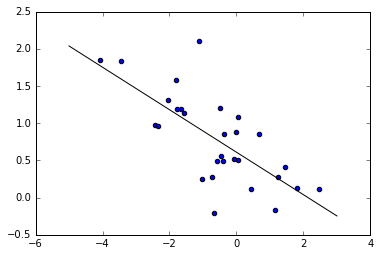

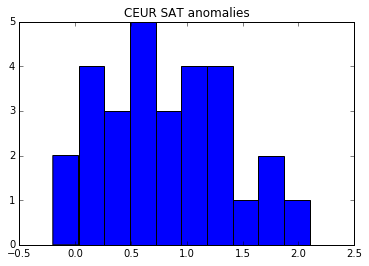

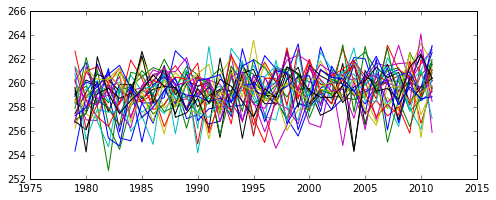

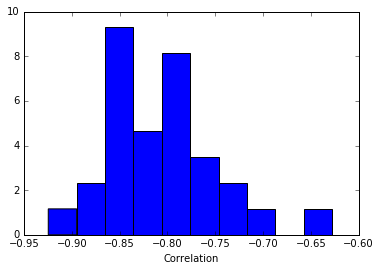

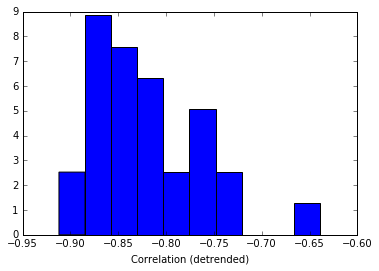

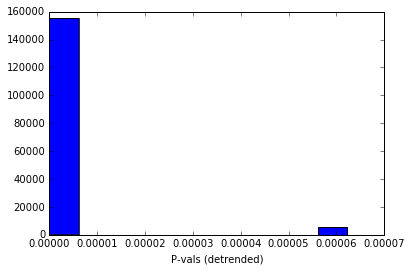

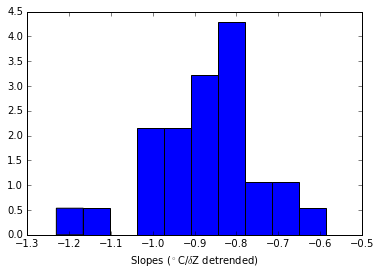

In [19]:
print clecircanom.shape


plt.figure()
plt.scatter(clecircanom,cleeursatranom)
cplt.add_regressline(clecircanom,cleeursatranom)


mm,bb,rval,pval = cutl.regress(clecircanom,cleeursatranom)
print mm,bb,rval,pval 

plt.figure()
plt.hist(cleeursatranom)
plt.title('CEUR SAT anomalies')

xx = np.arange(1979,2012)
print cleeursatr.shape
plt.figure(figsize=(8,3))
ret = plt.plot(xx,cleeursatr)


plt.figure()
plt.hist(clervt,normed=True)
plt.xlabel('Correlation')

plt.figure()
plt.hist(clervtdtr,normed=True)
plt.xlabel('Correlation (detrended)')

plt.figure()
plt.hist(clepvtdtr,normed=True)
plt.xlabel('P-vals (detrended)')

plt.figure()
plt.hist(clemmtdtr,normed=True)
plt.xlabel('Slopes ($^\circ$C/$\delta$Z detrended)')

print 'min/max slopes ' + str(np.min(clemmtdtr)) + ', ' + str(np.max(clemmtdtr))
print 'min/max correlations ' + str(np.min(clervtdtr)) + ', ' + str(np.max(clervtdtr))
